In [10]:
import numpy as np
import mne
import pickle
import sys
import os

# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(BASE_DIR)
%matplotlib inline
mne.utils.set_config('MNE_USE_CUDA', 'true')  
mne.cuda.init_cuda(verbose=True)

In [11]:
#Load transformed data from saved file into list
data=pickle.load(open('pickled/OpenBCISession_2020-02-14_11-09-00-SEVEN', 'rb'))

In [12]:
#Naming system for blocks into integers
bloc={
    "sync":1,
    "baseline":2,
    "stressor":3,
    "survey":4,
    "rest":5,
    "slowBreath":6,
    "paced":7
}

def createMNEObj(data, name='Empty'):
    #Create Metadata
    
    sampling_rate = 125
    channel_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4',
                    'time', 'bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'segment_indices1', 'segment_indices2', 'block']
    channel_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
                     'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'stim']
    n_channels = len(channel_types)
    info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
    info['description'] = name
    print(info)
    transformed = []
    start=-1.0
    
    for i in range(len(data)):
        add=[]
        add=data[i][1:17]
#         print(data[i][19].keys())
        if start==-1:
            start=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(0.0)
        else:
            tim=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(tim-start)
#         add.append(str(data[i][18].hour)+':'+str(data[i][18].minute)+':'+str(data[i][18].second)+':'+str(int(data[i][18].microsecond/1000)))
#         try:
        add.append(data[i][19]['bpm'])
#         except Exception as e: 
#             print(e, i)
#             print(data[i][19])
#             print(len(data))
        
        add.append(data[i][19]['ibi'])
        add.append(data[i][19]['sdnn'])
        add.append(data[i][19]['sdsd'])
        add.append(data[i][19]['rmssd'])
        add.append(data[i][19]['pnn20'])
        add.append(data[i][19]['pnn50'])
        add.append(data[i][19]['hr_mad'])
        add.append(data[i][19]['sd1'])
        add.append(data[i][19]['sd2'])
        add.append(data[i][19]['s'])
        add.append(data[i][19]['sd1/sd2'])
        add.append(data[i][19]['breathingrate'])
        add.append(data[i][19]['segment_indices'][0])
        add.append(data[i][19]['segment_indices'][1])
        add.append(bloc[data[i][20]])
        transformed.append(np.array(add))
    
    transformed=np.array(transformed)
    print(transformed[0])
    #have to convert rows to columns to fit MNE structure
    transformed=transformed.transpose()
    print(transformed[0], transformed[1], transformed[2], transformed[3])
    print(len(transformed[0]))
    loaded=mne.io.RawArray(transformed, info)
    return loaded

In [13]:
raw=createMNEObj(data)
#raw.filter(0.5, 50, fir_design='firwin')
mne.io.Raw.filter(raw,l_freq=1,h_freq=50)

<ipython-input-12-f7810211a598>:21: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['segment_indices1', 'segment_indices2']
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
<ipython-input-12-f7810211a598>:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'segment_indices'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Warning: converting a masked element to nan.


<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, ...
    chs : list | 33 items (EEG: 16, MISC: 16, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 5 items
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : NoneType | unspecified
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

<RawArray  |  None, n_channels x n_times : 33 x 201227 (1609.8 sec), ~50.7 MB, data loaded>

In [14]:
# montage = mne.channels.read_custom_montage('./cap.txt')
montage = mne.channels.make_standard_montage('easycap-M1')

In [15]:
raw.set_montage(montage, raise_if_subset=False)

DigMontage is a superset of info. 58 in DigMontage will be ignored. The ignored channels are: {'FT9', 'P6', 'PO4', 'O10', 'FC1', 'CP1', 'AFz', 'C6', 'FC3', 'FC2', 'C2', 'CP6', 'CPz', 'C1', 'P1', 'CP4', 'CP5', 'PO10', 'P9', 'F5', 'Fpz', 'F9', 'TP10', 'P10', 'P5', 'PO7', 'F6', 'Cz', 'O9', 'CP2', 'FC6', 'F1', 'TP9', 'FCz', 'TP7', 'Pz', 'PO9', 'AF4', 'PO8', 'TP8', 'Oz', 'P2', 'FT8', 'AF7', 'AF8', 'FT10', 'AF3', 'FC4', 'F10', 'C5', 'FT7', 'FC5', 'Fz', 'POz', 'PO3', 'F2', 'Iz', 'CP3'}


<RawArray  |  None, n_channels x n_times : 33 x 201227 (1609.8 sec), ~50.7 MB, data loaded>

In [16]:
layout = mne.channels.read_layout('cap', path='./')
# layout.plot()  # same result as: mne.viz.plot_layout(biosemi_layout)

Effective window size : 16.384 (s)


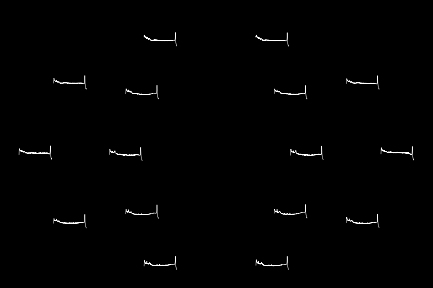

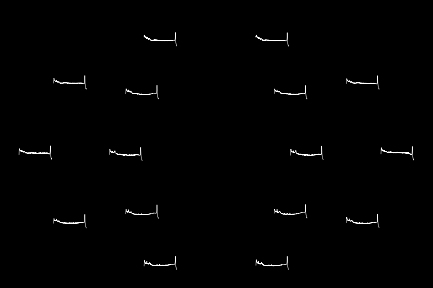

In [17]:
raw.plot_psd_topo(layout=layout)

Effective window size : 16.384 (s)


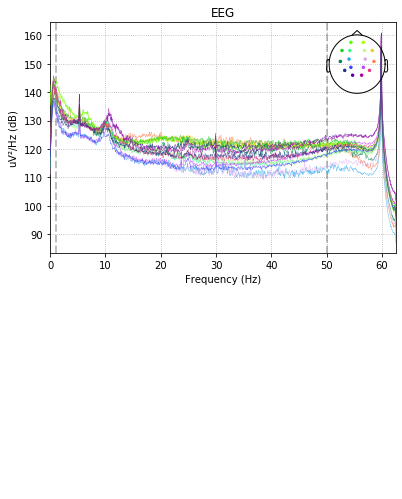

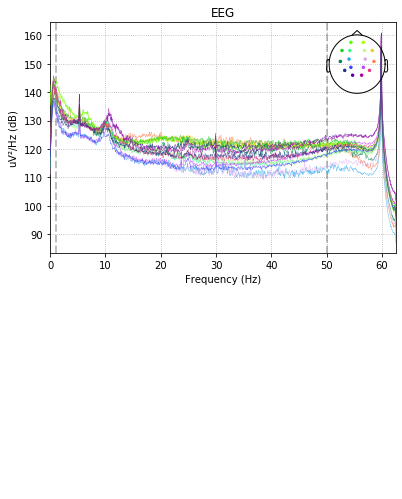

In [18]:
raw.plot_psd()

In [20]:
mne.io.Raw.filter(raw,l_freq=1,h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 413 samples (3.304 sec)



<RawArray  |  None, n_channels x n_times : 33 x 201227 (1609.8 sec), ~50.7 MB, data loaded>

Effective window size : 16.384 (s)


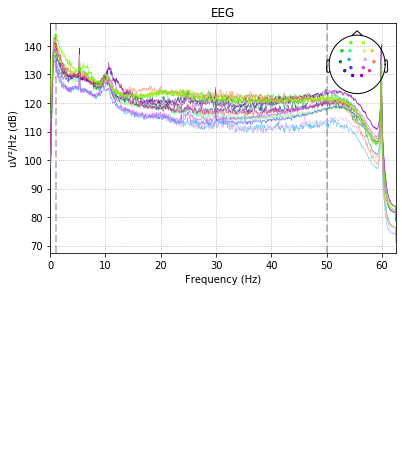

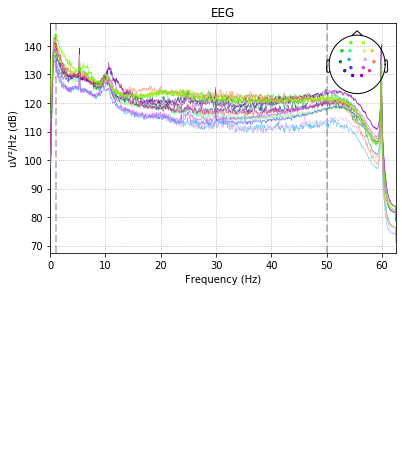

In [21]:
raw.plot_psd()

In [12]:
def hasNan(nl):
    for thing in nl:
        if type(thing) is list:
            if hasNan(thing):
                return True
        if thing != thing:
            return True
    return False

hasNan(raw)

ValueError: All picks must be < n_channels (33), got 33

/home/sean/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:1830: RuntimeWarning: invalid value encountered in subtract
  this_data -= this_data.mean(0)  # subtract segment means
/home/sean/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


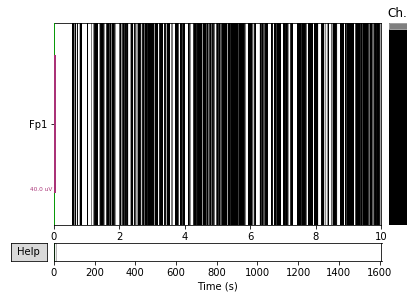

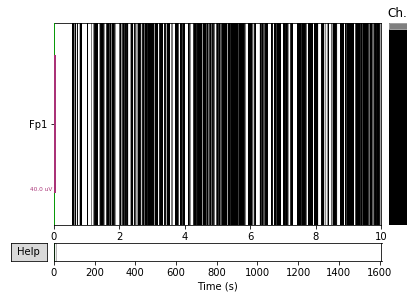

In [19]:
# picks = mne.pick_channels_regexp(raw.ch_names, regexp='EEG 05.')
raw.plot(duration=10.0, start=0.0, n_channels=1)

/home/sean/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:1830: RuntimeWarning: invalid value encountered in subtract
  this_data -= this_data.mean(0)  # subtract segment means
/home/sean/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


ValueError: cannot convert float NaN to integer

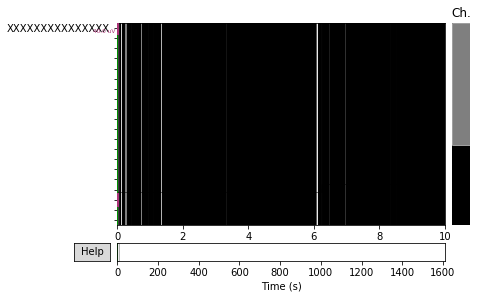

In [22]:
raw.plot()

In [26]:
raw.plot(duration=10.0, start=0.0, order=['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2'] n_channels=16)

SyntaxError: invalid syntax (<ipython-input-26-154402089d85>, line 1)

In [58]:
data = raw.get_data()
print(data.shape)

(33, 201118)


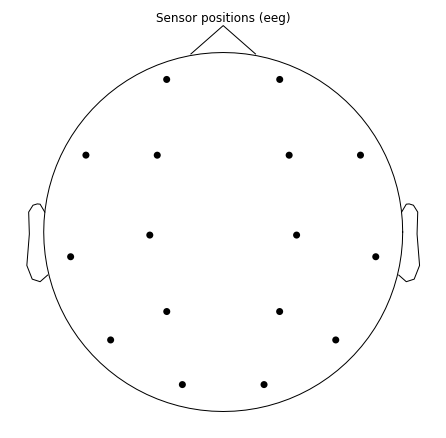

In [60]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

In [61]:
start, stop = 0, 200
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(33, 200)
(200,)


In [63]:
raw.load_data()  

<RawArray  |  None, n_channels x n_times : 33 x 201118 (1608.9 sec), ~50.7 MB, data loaded>